In [1]:
import pandas as pd
import numpy as  np

In [2]:
df = pd.read_csv("data/All_creatures_clean.csv")

In [3]:
conditions = [df['alignment'].isin(["LG","NG","CG","LN","N"]), [df['alignment'].isin(["LE","NE","CE","CN"])]]
values = [0,1]
array = np.select(conditions, values)

In [4]:
array[0]

array([1, 1, 0, ..., 0, 0, 1])

In [5]:
series = pd.Series(array[0])

In [6]:
df['target'] = series

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             2002 non-null   object
 1   alignment        2002 non-null   object
 2   trait            2002 non-null   object
 3   strength         2002 non-null   int64 
 4   dexterity        2002 non-null   int64 
 5   constitution     2002 non-null   int64 
 6   intelligence     2002 non-null   int64 
 7   charisma         2002 non-null   int64 
 8   wisdom           2002 non-null   int64 
 9   hp               2002 non-null   int64 
 10  ac               2002 non-null   int64 
 11  level            2002 non-null   int64 
 12  speed_raw        2002 non-null   object
 13  npc              2002 non-null   bool  
 14  rarity           2002 non-null   object
 15  sense            2002 non-null   object
 16  size             2002 non-null   object
 17  creature_family  2002 non-null   

## Base Model

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [9]:
object_cols = ["name", "alignment", "trait", "speed_raw", "rarity", "sense", "size", "creature_family", "target"]

In [10]:
X = df.drop(columns = object_cols)
y = df['target']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [29]:
tree_clf = DecisionTreeClassifier(max_depth = 10)

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

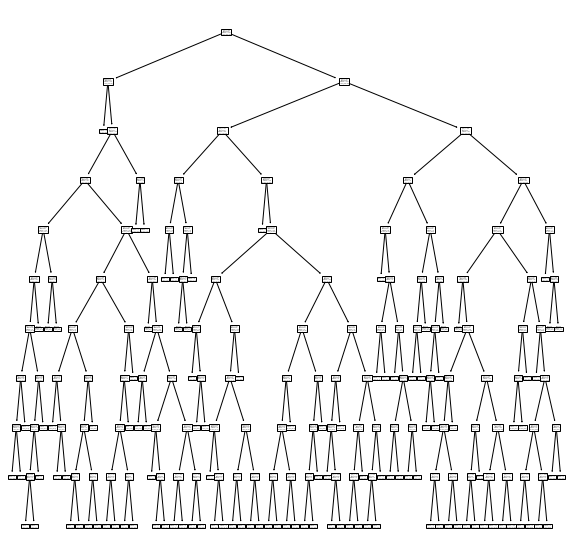

In [30]:
f, ax = plt.subplots(figsize=(10, 10))
plot_tree(tree_clf, ax=ax);

In [31]:
tree_clf.score(X_train, y_train)

0.8308351177730193

## Encoding

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             2002 non-null   object
 1   alignment        2002 non-null   object
 2   trait            2002 non-null   object
 3   strength         2002 non-null   int64 
 4   dexterity        2002 non-null   int64 
 5   constitution     2002 non-null   int64 
 6   intelligence     2002 non-null   int64 
 7   charisma         2002 non-null   int64 
 8   wisdom           2002 non-null   int64 
 9   hp               2002 non-null   int64 
 10  ac               2002 non-null   int64 
 11  level            2002 non-null   int64 
 12  speed_raw        2002 non-null   object
 13  npc              2002 non-null   bool  
 14  rarity           2002 non-null   object
 15  sense            2002 non-null   object
 16  size             2002 non-null   object
 17  creature_family  2002 non-null   

In [34]:
df['rarity'].unique()

array(['unique', 'uncommon', 'common', 'rare'], dtype=object)

In [36]:
ord_cat_selector = ["rarity"]

In [37]:
cat_subset = df[ord_cat_selector]

In [38]:
rarity_list = ['common', 'uncommon', 'rare', 'unique']

In [39]:
o_enc = OrdinalEncoder(categories = [rarity_list])
o_enc.fit(cat_subset)

OrdinalEncoder(categories=[['common', 'uncommon', 'rare', 'unique']])

In [40]:
X_subset = pd.DataFrame(o_enc.transform(cat_subset),
                        columns = cat_subset.columns)
X_subset

,rarity
0,3.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
1997,0.0
1998,3.0
1999,2.0
2000,0.0


In [41]:
df['rarity_ord'] = X_subset

In [43]:
df['rarity_ord'].value_counts()

0.0    1007
1.0     452
3.0     278
2.0     265
Name: rarity_ord, dtype: int64

In [44]:
df['rarity'].value_counts()

common      1007
uncommon     452
unique       278
rare         265
Name: rarity, dtype: int64

In [45]:
from sklearn.preprocessing import OneHotEncoder
onehot_enc = OneHotEncoder(drop = 'first', sparse = False)

In [47]:
nominal_cols = ['speed_raw', 'sense', 'size', 'creature_family']
nom_col = onehot_enc.fit_transform(df[nominal_cols])

In [50]:
nom_col.shape

(2002, 1160)